# Лабораторная работа 3. Обучение с учителем. Задача регрессии

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders.binary import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
import seaborn as sns
from scipy import stats
import numpy as np
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

## Предобработка данных

In [2]:
df= pd.read_csv('../data/DataSet3-v8.csv')
pd.set_option('display.max_columns', None)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,Минская обл.,9,13,False,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,Минская обл.,12,54,False,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,Минская обл.,4,72,False,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,Минская обл.,9,42,True,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,Гомельская обл.,14,7,False,True,False,True,True,False,False,False,False,True,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [4]:
df.isna().sum().sort_values(ascending=False)

engine_capacity      10
manufacturer_name     0
location_region       0
feature_9             0
feature_8             0
feature_7             0
feature_6             0
feature_5             0
feature_4             0
feature_3             0
feature_2             0
feature_1             0
feature_0             0
up_counter            0
number_of_photos      0
is_exchangeable       0
model_name            0
price_usd             0
drivetrain            0
state                 0
has_warranty          0
body_type             0
engine_type           0
engine_has_gas        0
engine_fuel           0
year_produced         0
odometer_value        0
color                 0
transmission          0
duration_listed       0
dtype: int64

**Выводы:**<br>
1. в одном столбце "engine_capacity" есть 10 пропусков;<br>
2. не все признаки числовые (а это необходимо при решении задачи ML)


### Заполнение пропусков

In [5]:
df[df["engine_capacity"].isna()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
8782,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,hatchback,False,owned,front,14900.0,True,Минская обл.,11,13,False,True,False,True,True,True,False,True,True,True,77
9048,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,hatchback,False,owned,front,16000.0,False,Минская обл.,18,1,False,False,False,True,False,True,False,True,False,True,11
24226,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,liftback,False,owned,front,12950.0,True,Минская обл.,21,5,False,False,False,True,False,False,False,True,True,True,6
25943,Nissan,Leaf,automatic,white,57357,2015,electric,False,electric,NaN,hatchback,False,owned,front,13850.0,False,Минская обл.,20,57,False,True,True,True,True,True,True,True,True,True,75
26203,Nissan,Leaf,automatic,blue,97400,2011,electric,False,electric,NaN,hatchback,False,owned,front,9300.0,True,Минская обл.,7,21,False,True,False,False,False,False,False,True,False,True,64
26222,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,hatchback,False,owned,front,12900.0,False,Минская обл.,12,7,False,True,False,False,False,True,False,True,True,False,18
26582,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,hatchback,False,owned,front,14500.0,False,Минская обл.,12,19,False,False,False,False,False,True,True,True,True,True,138
26914,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,hatchback,False,owned,front,15500.0,False,Брестская обл.,5,2,False,True,False,True,False,True,True,True,True,True,58
27554,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,hatchback,False,owned,rear,24750.0,True,Минская обл.,23,17,False,True,True,True,False,True,True,True,True,True,18
29590,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,liftback,False,owned,rear,39999.0,False,Минская обл.,6,2,False,True,True,True,True,True,True,True,True,True,57


Объём двигателя электрифицированного автомобиля равен нулю, поэтому заполню пропуски нулями

In [6]:
df['engine_capacity']=df['engine_capacity'].fillna(0)

In [7]:
df.isna().sum().sort_values(ascending=False)

manufacturer_name    0
model_name           0
feature_9            0
feature_8            0
feature_7            0
feature_6            0
feature_5            0
feature_4            0
feature_3            0
feature_2            0
feature_1            0
feature_0            0
up_counter           0
number_of_photos     0
location_region      0
is_exchangeable      0
price_usd            0
drivetrain           0
state                0
has_warranty         0
body_type            0
engine_capacity      0
engine_type          0
engine_has_gas       0
engine_fuel          0
year_produced        0
odometer_value       0
color                0
transmission         0
duration_listed      0
dtype: int64

### Дупликаты

Проверяю на наличие дупликатов. Если есть, удалю их

In [8]:
df.duplicated().sum()

40

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

### Перевод категориальных и будевых (True, False) признаков в числа

In [10]:
bn = BinaryEncoder()
df_bn_obj = bn.fit_transform(df.select_dtypes(include=['object','bool'])).astype('int8')
df_num = df.select_dtypes(exclude=['object', 'bool'])
df = pd.concat([df_num, pd.DataFrame(df_bn_obj)], axis=1)
pd.set_option('display.max_columns', None)
df

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_has_gas,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,has_warranty,state_0,state_1,drivetrain_0,drivetrain_1,is_exchangeable,location_region_0,location_region_1,location_region_2,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1
1,290000,2002,3.0,5000.00,12,54,83,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1
2,402000,2001,2.5,2800.00,4,72,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1
3,10000,1999,3.0,9999.00,9,42,86,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38486,290000,2000,3.5,2750.00,5,85,301,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,1
38487,321000,2004,2.2,4800.00,4,20,317,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1
38488,777957,2000,3.5,4300.00,3,63,369,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1
38489,20000,2001,2.0,4000.00,7,156,490,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1


## EDA

Выбросы могут присутствовать в столбцах с числовыми значениями (не будевые 0,1). Значит иследуем их:

In [11]:
df.describe()[['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']]

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38491.000000,38491.000000,38491.000000,38491.000000,38491.000000,38491.000000,38491.000000
mean,249058.310514,2002.930815,2.055004,6632.809227,9.644878,16.320231,80.650100
std,135918.326857,8.056156,0.672116,6424.033741,6.093970,43.307049,112.861243
min,0.000000,1942.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8950.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


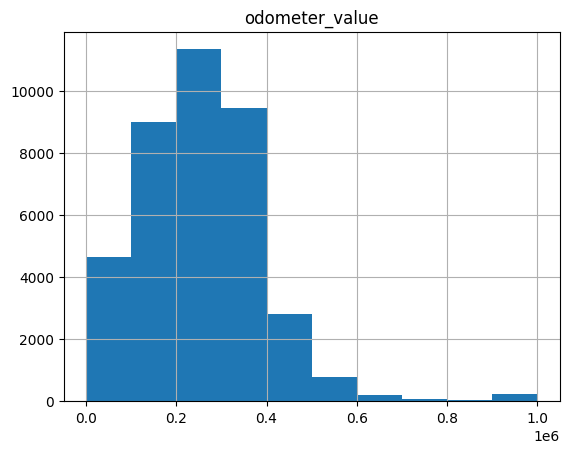

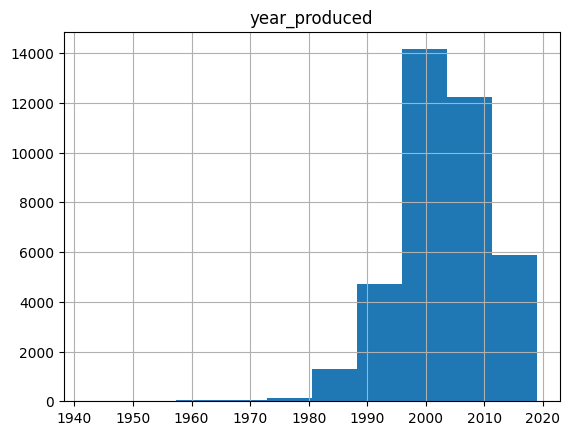

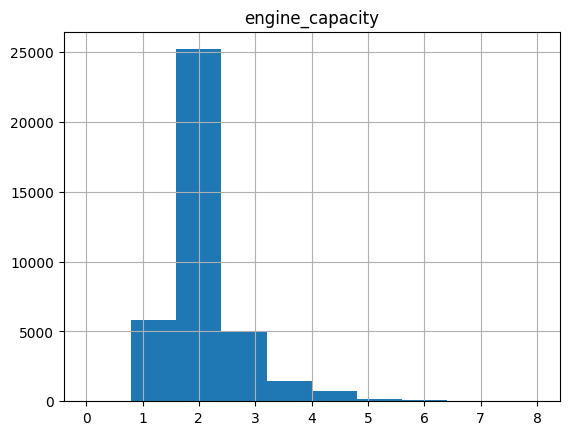

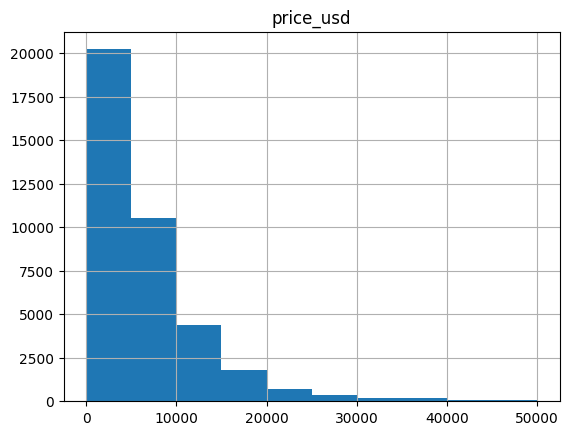

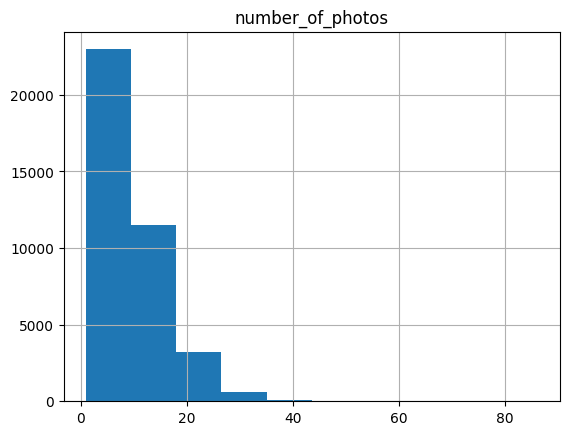

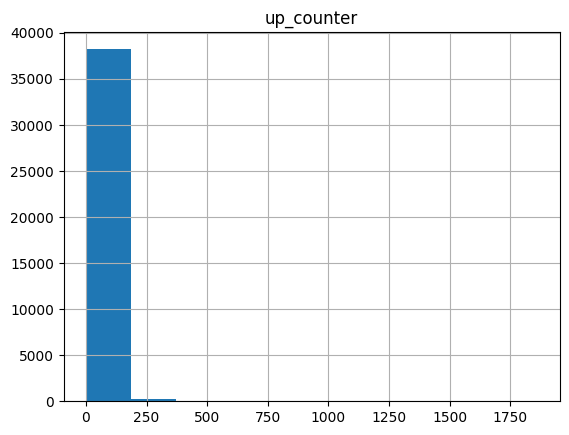

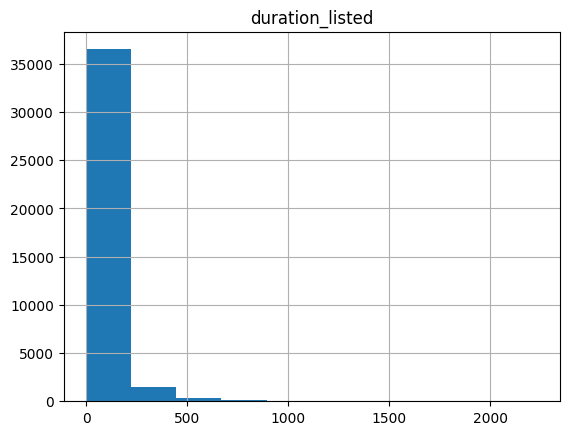

In [12]:
columns = ['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']
for column in columns:
    df.hist(column)

Судя по графикам, в данных присутствуют выбросы, которые необходимо удалить

In [13]:
outlier = df[['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']]
outlier

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,10900.00,9,13,16
1,290000,2002,3.0,5000.00,12,54,83
2,402000,2001,2.5,2800.00,4,72,151
3,10000,1999,3.0,9999.00,9,42,86
4,280000,2001,2.5,2134.11,14,7,7
...,...,...,...,...,...,...,...
38486,290000,2000,3.5,2750.00,5,85,301
38487,321000,2004,2.2,4800.00,4,20,317
38488,777957,2000,3.5,4300.00,3,63,369
38489,20000,2001,2.0,4000.00,7,156,490


In [14]:
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1
df_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
df_filtered

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
0,190000,2010,2.5,10900.00,9,13,16
4,280000,2001,2.5,2134.11,14,7,7
7,350000,2004,2.5,4500.00,7,29,73
8,179000,2010,2.5,12900.00,17,33,87
9,571317,1999,2.5,4200.00,8,11,43
...,...,...,...,...,...,...,...
38474,300000,2002,2.4,3700.00,12,4,161
38476,179000,1998,3.3,3450.00,6,6,167
38477,240000,2005,2.5,6500.00,8,2,177
38478,177000,2003,2.4,2800.00,7,2,181


Сохраним данные без выбросов в новом датасете:

In [15]:
index_list = list(df_filtered.index.values)

df_filtered = df[df.index.isin(index_list)]
df_filtered.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_has_gas,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,has_warranty,state_0,state_1,drivetrain_0,drivetrain_1,is_exchangeable,location_region_0,location_region_1,location_region_2,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1
7,350000,2004,2.5,4500.00,7,29,73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1
8,179000,2010,2.5,12900.00,17,33,87,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1
9,571317,1999,2.5,4200.00,8,11,43,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1


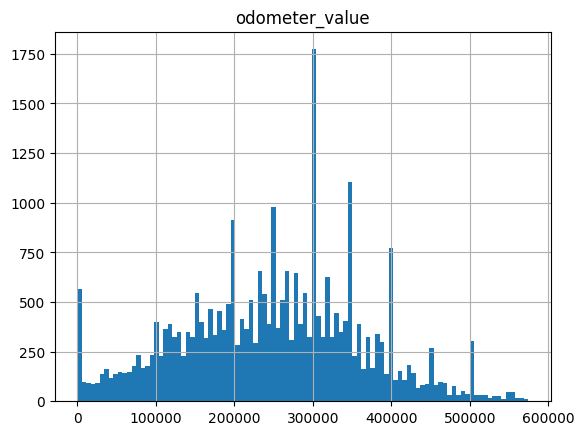

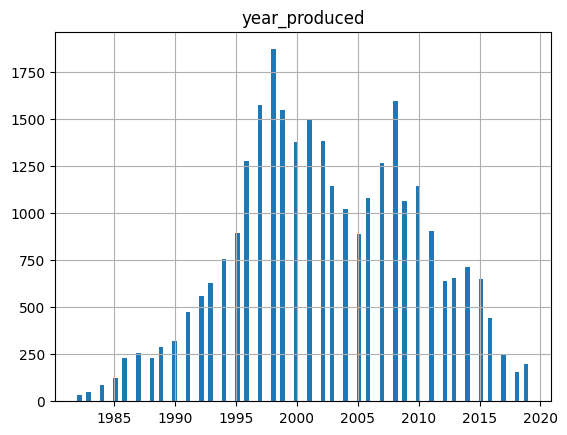

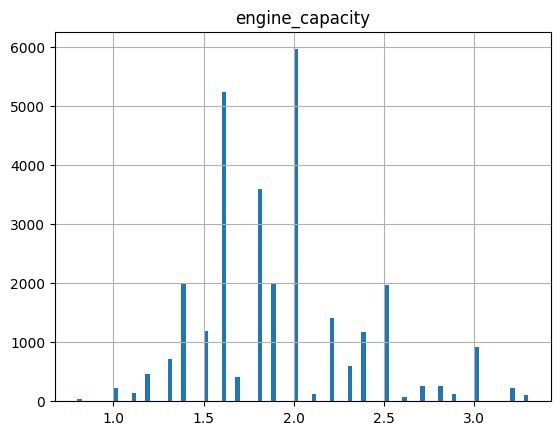

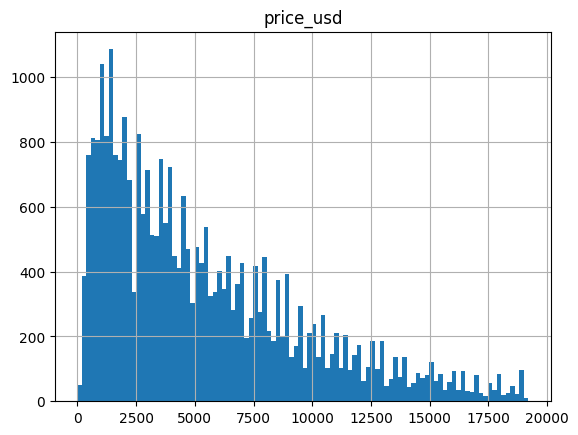

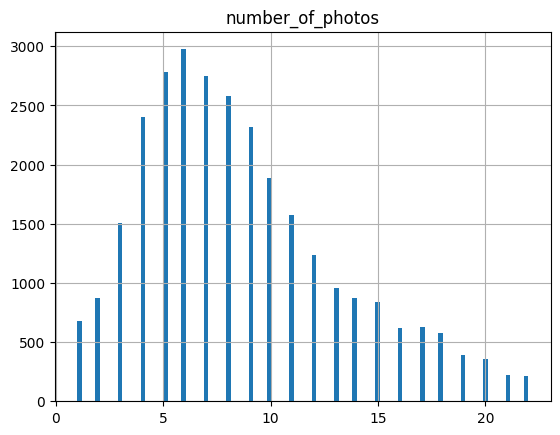

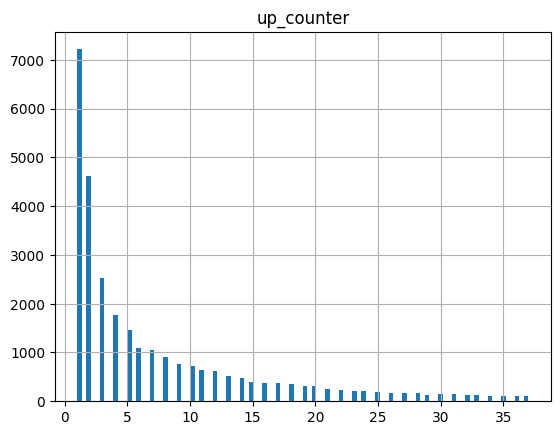

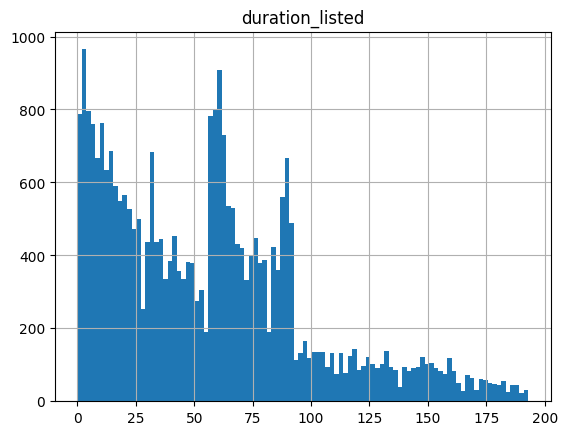

In [16]:
for column in columns:
    df_filtered.hist(column, bins=100)

Особо лучше график выглядеть не стали, но если посмотреть на описательную статистику, то мы увидим, что выбросы присутствовали и их теперь нет.

In [17]:
df_filtered.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_has_gas,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,has_warranty,state_0,state_1,drivetrain_0,drivetrain_1,is_exchangeable,location_region_0,location_region_1,location_region_2,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
count,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000,29226.000000
mean,250150.881715,2002.436290,1.918720,5357.261001,8.627352,7.313214,56.373982,0.400568,0.549887,0.528844,0.599261,0.569322,0.511189,0.060734,0.322726,0.569698,0.466537,0.500582,0.481352,0.627934,0.436187,0.418874,0.480360,0.527578,0.728050,0.271950,0.204954,0.375898,0.347533,0.464278,0.005235,0.373264,0.962020,0.032779,0.340519,0.659481,0.037638,0.370150,0.584240,0.551427,0.006467,0.015226,0.990146,0.910833,0.212482,0.319886,0.220968,0.232225,0.777150,0.236365,0.594197,0.181311,0.234517,0.190721,0.313659,0.129782,0.220933,0.369979,0.552488
std,115368.907306,7.513692,0.437234,4243.735977,4.662408,8.214654,43.140438,0.490022,0.497514,0.499176,0.490057,0.495180,0.499883,0.238845,0.467527,0.495127,0.498887,0.500008,0.499661,0.483364,0.495920,0.493383,0.499623,0.499247,0.444972,0.444972,0.403675,0.484362,0.476195,0.498731,0.072165,0.483680,0.191151,0.178061,0.473892,0.473892,0.190322,0.482853,0.492861,0.497357,0.080158,0.122453,0.098780,0.284990,0.409071,0.466440,0.414906,0.422259,0.416165,0.424856,0.491055,0.385282,0.423704,0.392876,0.463988,0.336069,0.414883,0.482807,0.497246
min,0.000000,1982.000000,0.800000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170000.000000,1997.000000,1.600000,1950.000000,5.000000,2.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,253000.000000,2002.000000,1.900000,4200.000000,8.000000,4.000000,54.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000

Далее буду использовать отфильтрованный датасет

In [18]:
df=df_filtered
df

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_has_gas,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,has_warranty,state_0,state_1,drivetrain_0,drivetrain_1,is_exchangeable,location_region_0,location_region_1,location_region_2,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,10900.00,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1
4,280000,2001,2.5,2134.11,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1
7,350000,2004,2.5,4500.00,7,29,73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1
8,179000,2010,2.5,12900.00,17,33,87,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1
9,571317,1999,2.5,4200.00,8,11,43,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38474,300000,2002,2.4,3700.00,12,4,161,1,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
38476,179000,1998,3.3,3450.00,6,6,167,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
38477,240000,2005,2.5,6500.00,8,2,177,1,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1
38478,177000,2003,2.4,2800.00,7,2,181,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


## Построение моделей регрессии

### Простая линейная регрессия

Для выбора столбцов, на основе которых будем строить модель, посмотрим на их корреляцию

In [19]:
df.corr()


,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_has_gas,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,has_warranty,state_0,state_1,drivetrain_0,drivetrain_1,is_exchangeable,location_region_0,location_region_1,location_region_2,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
odometer_value,1.000000,-0.516523,0.278286,-0.417328,-0.095030,0.005337,0.038103,-0.025033,0.044276,0.088438,0.090121,0.082388,0.028907,0.023993,-0.014125,0.109434,0.035123,0.045397,0.053602,-0.003465,-0.042072,-0.004969,0.005312,0.057255,0.195789,-0.195789,0.045784,-0.116194,0.025947,0.022242,-0.039874,0.293840,-0.036221,0.055326,0.279227,-0.279227,0.043447,-0.003001,-0.025966,0.119444,-0.162088,-0.098731,0.004472,0.083112,0.071642,0.060393,0.070069,0.095149,-0.079458,0.088929,-0.141918,-0.017555,-0.210629,-0.018150,-0.232755,-0.130300,-0.235683,-0.186442,-0.057794
year_produced,-0.516523,1.000000,-0.113429,0.803472,0.226941,0.043725,0.012648,0.096079,-0.099403,-0.082639,-0.110688,-0.090600,-0.080088,-0.004508,0.069128,-0.171041,-0.011546,-0.045711,-0.055147,0.002103,0.077065,-0.046862,-0.022605,-0.072391,-0.343970,0.343970,-0.099381,0.194697,-0.143472,-0.047172,0.060659,-0.015173,0.052586,-0.081406,0.014963,-0.014963,-0.051993,0.001832,0.033378,-0.122597,0.168367,0.047523,0.060839,-0.146788,-0.061511,-0.096401,-0.134659,-0.139848,0.149604,-0.358868,0.452319,0.155350,0.422029,0.147398,0.437347,0.322565,0.444583,0.459547,0.223156
engine_capacity,0.278286,-0.113429,1.000000,0.161916,0.043001,0.038747,0.023456,0.148229,-0.094827,0.062078,0.125238,-0.053351,0.117498,-0.005710,0.165302,0.043184,0.018911,0.000756,0.016563,0.002017,0.065657,0.002829,0.022680,-0.005085,-0.318650,0.318650,-0.013247,0.067689,-0.084806,-0.048959,-0.050387,0.288695,-0.047336,0.071185,0.267891,-0.267891,0.123278,-0.267977,0.310830,0.121948,-0.058030,-0.052680,0.022572,-0.358798,0.487787,0.070499,0.008376,0.023065,-0.011993,-0.119235,0.097791,0.301675,0.129973,0.371886,0.175108,0.139718,0.077531,0.162429,0.214284
price_usd,-0.417328,0.803472,0.161916,1.000000,0.255552,0.045374,0.021722,0.147116,-0.064353,0.006532,-0.078997,-0.107248,0.061652,-0.067360,0.158614,-0.028487,0.086619,-0.074598,0.018410,0.007146,0.078622,-0.007656,-0.055026,-0.044892,-0.435395,0.435395,-0.074458,0.228195,-0.151970,-0.081981,0.061234,0.090751,0.048563,-0.077175,0.121539,-0.121539,0.008080,-0.114554,0.191012,-0.071387,0.192860,0.043565,0.087304,-0.304813,0.181599,-0.067028,-0.136890,-0.115554,0.137788,-0.319465,0.362074,0.295265,0.503691,0.294389,0.486090,0.435216,0.527034,0.516596,0.306557
number_of_photos,-0.095030,0.226941,0.043001,0.255552,1.000000,0.166633,-0.109203,0.043951,-0.022203,0.000259,-0.008558,-0.030494,0.002090,-0.006162,0.034814,-0.008188,0.016491,-0.014533,-0.000655,0.010246,0.019172,-0.010621,-0.029105,-0.014952,-0.144114,0.144114,-0.043848,0.066061,-0.032627,-0.006247,0.006205,0.005450,0.030537,-0.035405,0.018825,-0.018825,-0.033551,-0.034710,0.054812,-0.004079,0.090223,0.008380,0.059116,-0.074425,0.030914,0.089603,-0.074794,-0.063053,0.064313,-0.115714,0.096852,0.087178,0.133201,0.094375,0.127867,0.126363,0.141482,0.165922,0.122592
up_counter,0.005337,0.043725,0.038747,0.045374,0.166633,1.000000,0.224868,0.008647,-0.020409,-0.003213,0.011410,-0.017131,0.001313,-0.013184,0.019412,-0.006722,-0.002702,-0.005876,-0.004137,-0.022691,0.005242,-0.003439,0.003842,-0.012385,-0.062266,0.062266,0.003238,0.010681,-0.009695,0.002840,0.006931,-0.007121,-0.006022,0.003601,-0.008641,0.008641,0.020758,-0.012

Я хочу предсказывать цену автомобиля на основе другого признака. Подберу его в соответствие с коэффициентом корреляции Пирсона и P-значением

In [20]:
col_list = df.columns.to_list()
Y = df['price_usd']
for x_pearson in col_list:
  pearson_coef, p_value = stats.pearsonr(df[x_pearson], Y)
  print(x_pearson)
  print('Коэффициент корреляции Пирсона = ', pearson_coef, ' P-значение = ', p_value)
  print('')

odometer_value
Коэффициент корреляции Пирсона =  -0.4173284886018918  P-значение =  0.0

year_produced
Коэффициент корреляции Пирсона =  0.8034716201042229  P-значение =  0.0

engine_capacity
Коэффициент корреляции Пирсона =  0.16191554744279385  P-значение =  7.4309233020391825e-171

price_usd
Коэффициент корреляции Пирсона =  1.0  P-значение =  0.0

number_of_photos
Коэффициент корреляции Пирсона =  0.2555517479639347  P-значение =  0.0

up_counter
Коэффициент корреляции Пирсона =  0.0453735491135314  P-значение =  8.456086100205533e-15

duration_listed
Коэффициент корреляции Пирсона =  0.021722439245726144  P-значение =  0.00020411884987679

manufacturer_name_0
Коэффициент корреляции Пирсона =  0.1471163537056953  P-значение =  4.432769613979245e-141

manufacturer_name_1
Коэффициент корреляции Пирсона =  -0.06435324290403309  P-значение =  3.325448351389808e-28

manufacturer_name_2
Коэффициент корреляции Пирсона =  0.006531515332259355  P-значение =  0.2641796083579974

manufacturer

Наибольшая корреляция цены и года производства, а P-значение равно 0, то есть корреляция значительна.<br>
Создадим пайплайн

In [21]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', LinearRegression()),
    ]
)

Выделеним целевой признак и предиктор.

In [22]:
y = pd.DataFrame(df["price_usd"])
x = pd.DataFrame(df["year_produced"])

In [23]:
y

,price_usd
0,10900.00
4,2134.11
7,4500.00
8,12900.00
9,4200.00
...,...
38474,3700.00
38476,3450.00
38477,6500.00
38478,2800.00


In [24]:
x

,year_produced
0,2010
4,2001
7,2004
8,2010
9,1999
...,...
38474,2002
38476,1998
38477,2005
38478,2003


Разделим на обучающую и тестовую выборки (20% в тест)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Обучим модель и сделаем прогноз

In [26]:
lr = pipeline.fit(x_train, y_train)
y_pred = pd.DataFrame(lr.predict(x_test))

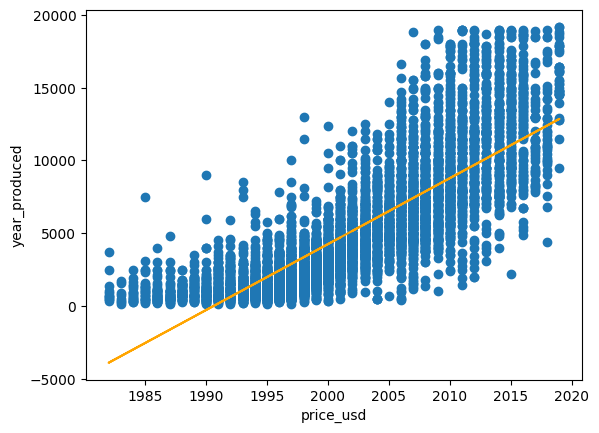

In [27]:
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("price_usd")
plt.ylabel("year_produced")
plt.show()

Метрики качества:

In [28]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(x_test, y_test)}')

MAE: 1913.0940604490957
MSE: 6349941.52581208
RMSE: 2519.9090312572953
MAPE: 0.8682199128774071
R^2: 0.65288416146849


**Применим регуляризацию Lasso.**

Пайплайн, подбор параметра param_grid с помощью GridSearchCV

In [29]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1}

Обучаем модель

MAE: 1913.0752231953802
MSE: 6349959.8121114215
RMSE: 2519.912659619659
MAPE: 0.8681978504969123
R^2: 0.65288416146849


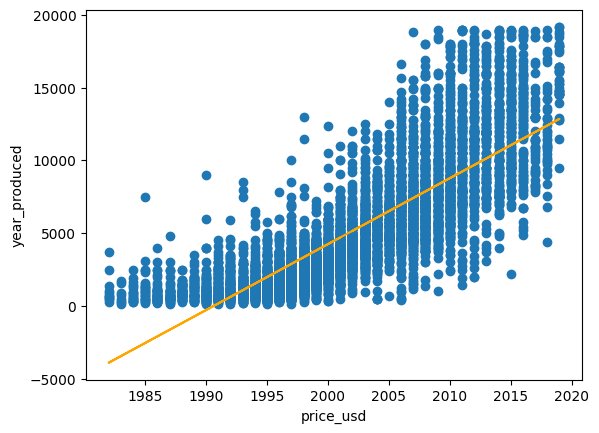

In [30]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("price_usd")
plt.ylabel("year_produced")
plt.show()

**Теперь Ridge**

In [31]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.0}

MAE: 1913.0940604490982
MSE: 6349941.525812078
RMSE: 2519.909031257295
MAPE: 0.8682199128774098
R^2: 0.65288416146849


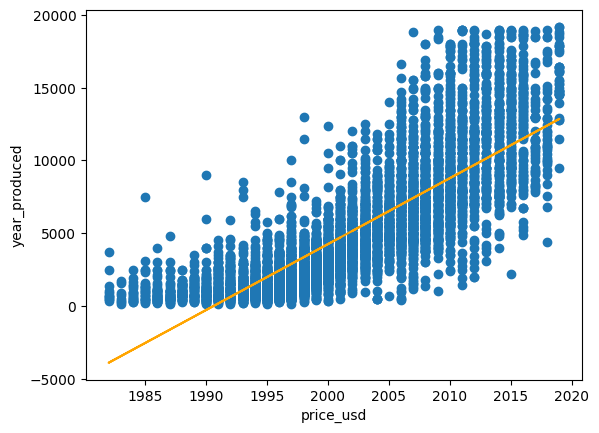

In [32]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("price_usd")
plt.ylabel("year_produced")
plt.show()

**Ещё один вид регуляризации - ElasticNet**

In [33]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet())
    ]
)
param_grid = {
    "model__alpha": [0.1, 0.5, 1, 5, 30],
    "model__l1_ratio": np.arange(0.1, 1, 0.1),
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.9}

MAE: 1947.729973752107
MSE: 6828897.460255161
RMSE: 2613.2159230065854
MAPE: 0.8656481930332243
R^2: 0.65288416146849


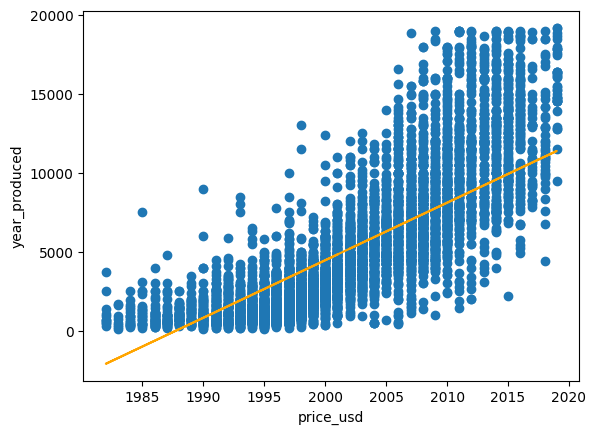

In [34]:
pipeline = pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(x_test, y_test)}')

plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, y_pred, c="orange")
plt.xlabel("price_usd")
plt.ylabel("year_produced")
plt.show()

### Множественная линейная регрессия

Выделеним целевой признак и предикторы. Мы хотим научиться предсказывать стоимость автомобиля на основе значений всех предикторов. То есть, в данном случае, хотим научиться предсказывать значение признака "price_usd".<br>
Разделим на обучающую и тестовую выборки.

In [35]:
y = pd.DataFrame(df["price_usd"])
x = pd.DataFrame(df.drop(["price_usd"], axis=1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
y

,price_usd
0,10900.00
4,2134.11
7,4500.00
8,12900.00
9,4200.00
...,...
38474,3700.00
38476,3450.00
38477,6500.00
38478,2800.00


In [37]:
x

,odometer_value,year_produced,engine_capacity,number_of_photos,up_counter,duration_listed,manufacturer_name_0,manufacturer_name_1,manufacturer_name_2,manufacturer_name_3,manufacturer_name_4,manufacturer_name_5,model_name_0,model_name_1,model_name_2,model_name_3,model_name_4,model_name_5,model_name_6,model_name_7,model_name_8,model_name_9,model_name_10,transmission_0,transmission_1,color_0,color_1,color_2,color_3,engine_fuel_0,engine_fuel_1,engine_fuel_2,engine_has_gas,engine_type_0,engine_type_1,body_type_0,body_type_1,body_type_2,body_type_3,has_warranty,state_0,state_1,drivetrain_0,drivetrain_1,is_exchangeable,location_region_0,location_region_1,location_region_2,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,190000,2010,2.5,9,13,16,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,1,1,1
4,280000,2001,2.5,14,7,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1
7,350000,2004,2.5,7,29,73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,1
8,179000,2010,2.5,17,33,87,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1
9,571317,1999,2.5,8,11,43,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38474,300000,2002,2.4,12,4,161,1,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
38476,179000,1998,3.3,6,6,167,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
38477,240000,2005,2.5,8,2,177,1,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1
38478,177000,2003,2.4,7,2,181,1,1,0,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0


**Создадим пайплайн**

In [38]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', LinearRegression()),
    ]
)

Обучим модель и сделаем прогноз

In [39]:
mlr = LinearRegression().fit(x_train, y_train)
y_pred = mlr.predict(x_test)

In [40]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {mlr.score(x_test, y_test)}')

MAE: 1371.7906290133287
MSE: 3406570.006625846
RMSE: 1845.6895748272098
MAPE: 0.7724107858051392
R^2: 0.8138240302589813


**Подберём параметр и применим регуляризацию L1**

In [41]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.2}

In [42]:
pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 1371.6337888178693
MSE: 3406052.708889882
RMSE: 1845.5494327949825
MAPE: 0.5973693450556599
R^2: 0.8138523016309039


**Теперь применим регуляризацию L2**

In [43]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.2, 1.2, 0.2)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.2}

In [44]:
pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 1371.7293062570925
MSE: 3406250.113844736
RMSE: 1845.6029133713287
MAPE: 0.7721357683971488
R^2: 0.8138415130491838


**ElasticNet**

In [45]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("model", ElasticNet())
    ]
)
param_grid = {
    "model__alpha": [0.1, 0.5, 1, 5, 30],
    "model__l1_ratio": np.arange(0.1, 1, 0.1),
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_
best_params

{'model__alpha': 0.1, 'model__l1_ratio': 0.9}

In [46]:
pipeline.set_params(**best_params)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 1446.262285248937
MSE: 3962426.518053113
RMSE: 1990.5844664452482
MAPE: 0.7471360254103296
R^2: 0.7834453429428403


### Полиномиальная регрессия

In [47]:
y = pd.DataFrame(df["price_usd"])
x = pd.DataFrame(df["year_produced"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
x

,year_produced
0,2010
4,2001
7,2004
8,2010
9,1999
...,...
38474,2002
38476,1998
38477,2005
38478,2003


In [49]:
y

,price_usd
0,10900.00
4,2134.11
7,4500.00
8,12900.00
9,4200.00
...,...
38474,3700.00
38476,3450.00
38477,6500.00
38478,2800.00


In [50]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", LinearRegression()),
    ]
)

In [51]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 1701.7163435271534
MSE: 5615987.815117032
RMSE: 2369.8075481179967
MAPE: 0.6093574120751074
R^2: 0.6804268822193484


**Lasso**

In [52]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Lasso()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 1702.2077201117863
MSE: 5616036.023793953
RMSE: 2369.817719529068
MAPE: 0.6095222016613795
R^2: 0.6804241389446664


In [53]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", Ridge()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 1701.9100431451038
MSE: 5615989.892325323
RMSE: 2369.807986383142
MAPE: 0.6094460161453223
R^2: 0.6804267640175374


In [54]:
pipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("polynomial", PolynomialFeatures(2)),
        ("model", ElasticNet()),
    ]
)

param_grid = {
    "model__alpha": np.arange(0.1, 1.1, 0.1)
}

gridsearch = GridSearchCV(pipeline, param_grid, scoring="r2")
gridsearch.fit(x_train, y_train)
best_params = gridsearch.best_params_

pipeline.set_params(**best_params).fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipeline.score(x_test, y_test)}')

MAE: 2000.604928244962
MSE: 7179234.699266039
RMSE: 2679.4093937407247
MAPE: 0.9071979309049657
R^2: 0.5914716178785591


### Реализуем метрики самостоятельно

In [123]:
y = df["price_usd"]
x = df["year_produced"].array.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [124]:
pipeline = Pipeline(
    [
        ('minmaxscaler', MinMaxScaler()),
        ('model', LinearRegression()),
    ]
)

lr = pipeline.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [132]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}, My MAE: {abs(y_test-y_pred).mean()} \n')
print(f'MSE: {mean_squared_error(y_test, y_pred)}, My MSE: {((y_test-y_pred)**2).mean()} \n')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}, My RMSE: {sqrt(((y_test-y_pred)**2).mean())}\n')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}, My_MAPE: {abs((y_test-y_pred)/y_test).mean()}\n')
print(f'R2: {pipeline.score(x_test, y_test)}, My_R2: {1 - ((y_test-y_pred)**2).mean()/ ((y_test- y_test.mean())**2).mean()}')

MAE: 1911.5877095946275, My MAE: 1911.5877095946275 

MSE: 6330954.000562137, My MSE: 6330954.000562137 

RMSE: 2516.138708529825, My RMSE: 2516.138708529825

MAPE: 0.7723077862291601, My_MAPE: 0.7723077862291601

R2: 0.6436523544196944, My_R2: 0.6436523544196944


Мои расчёты метрик по формулам сошлись с вычисленными программой с помощью библиотеки sklearn